In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline
pd.set_option('display.max_columns', None)

In [2]:
FF = pd.read_excel('../LeagueHistory.xlsx', sheet_name='2023') \
    .drop(['TOTAL', 'Mean', 'Std', 'Median','Year','Owner'],1) \
    .drop([12],0)
#add playoffs and place later
    
labels = np.array(FF['Team_Name'])

FF

,Team_Name,Week 1,Week 2,Week 3,Week 4,Week 5,Week 6,Week 7,Week 8,Week 9,Week 10,Week 11,Week 12,Week 13,Week 14,Week 15,Playoffs,Place
0,PurpleVector Reunion Tour,115.34,94.76,88.52,133.10,137.16,123.36,113.90,158.16,125.72,110.08,142.50,148.36,122.24,124.22,61.96,1.0,1.0
1,Sackwash Lyfe,91.80,146.48,146.78,124.66,116.52,128.70,111.76,150.56,104.68,146.82,73.84,139.50,106.52,83.38,161.52,1.0,2.0
2,Mr. Fans Noodle Haus,132.06,103.74,153.66,118.30,137.42,109.54,147.70,111.88,150.90,116.52,90.34,95.90,98.28,119.36,116.94,0.0,5.0
3,Brady really was washed…,94.02,109.80,123.06,148.02,120.84,103.00,99.66,176.86,124.76,143.96,91.66,129.04,166.06,97.74,97.06,1.0,3.0
4,GOBias Industries,95.84,133.54,86.56,121.46,85.60,114.94,84.56,124.98,109.04,85.10,141.06,132.06,92.22,116.20,72.56,0.0,9.0
5,Gee Whiz Darnell,126.24,142.56,97.56,115.58,95.52,106.68,106.14,141.66,123.72,144.08,112.30,113.50,162.60,101.50,134.48,1.0,4.0
6,2 Movin' 2 Up,123.86,120.18,133.78,114.84,73.24,96.02,146.88,113.18,106.20,96.82,109.86,90.18,112.24,122.24,122.64,0.0,8.0
7,Alternative Hypothesis,90.24,92.90,150.08,91.24,136.04,92.84,66.16,81.20,81.50,137.04,122.58,104.32,121.52,104.52,116.08,0.0,11.0
8,Herbin Legends,93.90,87.14,102.86,72.66,115.58,81.54,95.64,107.36,72.22,126.26,138.78,131.82,114.18,106.42,116.56,0.0,6.0
9,Pay Dirt & Pylons III,79.08,86.58,115.14,125.70,114.96,117.02,98.36,68.42,84.92,83.28,90.14,117.18,121.26,129.72,107.92,0.0,7.0


In [3]:
averages = np.zeros(15)
for z in range(15):
    averages[z] = np.mean(FF.loc[:,'Week '+str(z+1)])

cumulatives = np.zeros(180).reshape(12, 15)
for c in range(15):
    for r in range(12):
        cumulatives[r, c] = np.sum(FF.loc[r, 'Week 1': 'Week '+str(c+1)])
    
average_cum_per_week = np.mean(cumulatives, axis=0)
average_cum_per_week

array([  102.5       ,   218.45333333,   340.73166667,   453.12333333,
         566.28      ,   674.71      ,   779.29666667,   899.10333333,
        1009.63666667,  1128.28      ,  1238.29666667,  1357.37166667,
        1475.50166667,  1586.95      ,  1695.66166667])

In [4]:
cum_diffs = cumulatives.copy()
for r in range(12):
    cum_diffs[r,:] = cum_diffs[r,:] - average_cum_per_week

cum_diffs = np.hstack((np.zeros(24).reshape(12,2), cum_diffs))
cum_diffs = cum_diffs[:, 1:]

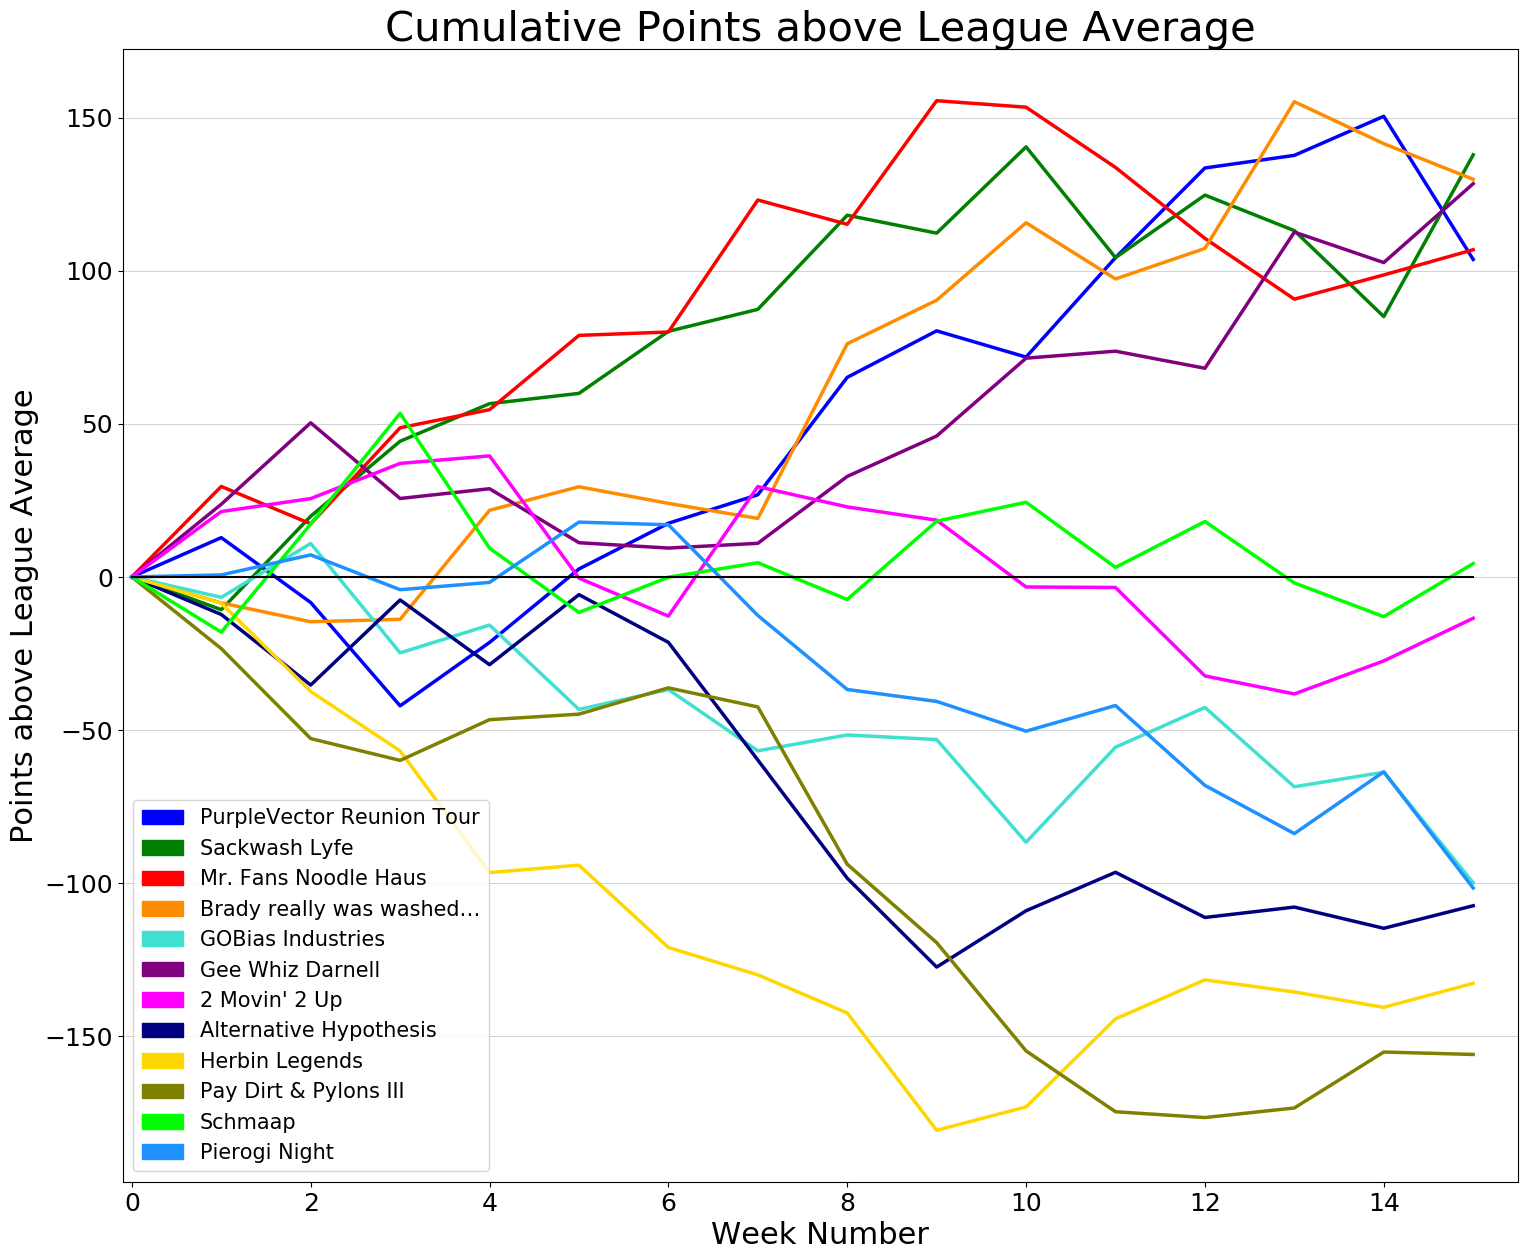

In [5]:
plt.figure(figsize=[18, 15])

colors = ['blue', 'green', 'red', 'darkorange', 'turquoise', 'purple',
          'magenta', 'navy', 'gold', 'olive', 'lime', 'dodgerblue']

patches = []
for i in range(12):
    plt.plot(np.array(cum_diffs[i,:]), colors[i], lw=2.5)
    patches.append(mpatches.Patch(color=colors[i], label=labels[i]))
    

plt.plot([0.0,15], [0,0], color = 'k')

plt.xlim([-0.1, 15.5])
plt.xlabel('Week Number', size=22)
plt.ylabel('Points above League Average', size=22)
plt.xticks(size=18)
plt.yticks(size=18)
plt.title('Cumulative Points above League Average', size=30)

plt.legend(handles=patches,prop={'size':15})
plt.grid(axis='y', lw=0.4)